## Comparing Python and Julia

This is a bruteforce attempt at solving Project Euler problem 14 with Python. The implementation is such that it is one-to-one with corresponding Julia code.

In [1]:
# Collatz
def collatz_chain(n):
    'Compute the Collatz chain for number n.'
    k = 1
    while n > 1:
        n = 3*n+1 if (n % 2) else n >> 1
        k += 1
        # print n
    return k

def solve_euler(stop):
    'Which of the number [1, stop) has the longest Collatz chain.'
    n, N, N_max = 1, 0, 0  
    while n < stop:
        value = collatz_chain(n)
        if value > N_max:
            N = n
            N_max = value
        n += 1
    return N, N_max

Python code here is slow so we rather not execute it multiple times as with %timeit magic.

In [2]:
import time

N = 1000000
t0 = time.time()
ans = solve_euler(N)
t1 = time.time() - t0
ans, t1

((837799, 525), 16.990110635757446)

Next we consider a problem of drawing a Julia fractal. In Python we try to implement a rather clever heavily vectorized algorithm

In [3]:
import numpy as np

# Adopted from https://thesamovar.wordpress.com/2009/03/22/fast-fractals-with-python-and-numpy/
def julia(x, y, c):
    X, Y = np.meshgrid(x, y)
    Z = X + complex(0, 1)*Y
    del X, Y
    
    C = c*np.ones(Z.shape, dtype=complex)
    img = 80*np.ones(C.shape, dtype=int)
    # We will shrink Z, C inside the loop if certain point is found unbounded
    ix, iy = np.mgrid[0:Z.shape[0], 0:Z.shape[1]]
    Z, C, ix, iy = map(lambda mat: mat.flatten(), (Z, C, ix, iy))

    for i in range(80):
        if not len(Z): break
        np.multiply(Z, Z, Z)  # z**2 + c
        np.add(Z, C, Z)
        rem = abs(Z) > 2.0    # Unbounded - definite color
        img[ix[rem], iy[rem]] = i + 1
        rem = ~rem            # Bounded - keep for next round
        Z = Z[rem]                    # Update variables for next round
        ix, iy = ix[rem], iy[rem]
        C = C[rem]
    return img

In [4]:
cs = (complex(-0.06, 0.67), complex(0.279, 0), complex(-0.4, 0.6), complex(0.285, 0.01))

x = np.arange(-1.5, 1.5, 0.002)
y = np.arange(1, -1, -0.002)

Js = []
# Evaluate fractal generation
t0 = time.time()
for c in cs:
    Js.append(julia(x, y, c))
t1 = time.time() - t0
print('Generated in %.4f s' % t1)
print('Image size %d x %d' % Js[0].shape)

Generated in 3.9274 s
Image size 1000 x 1500


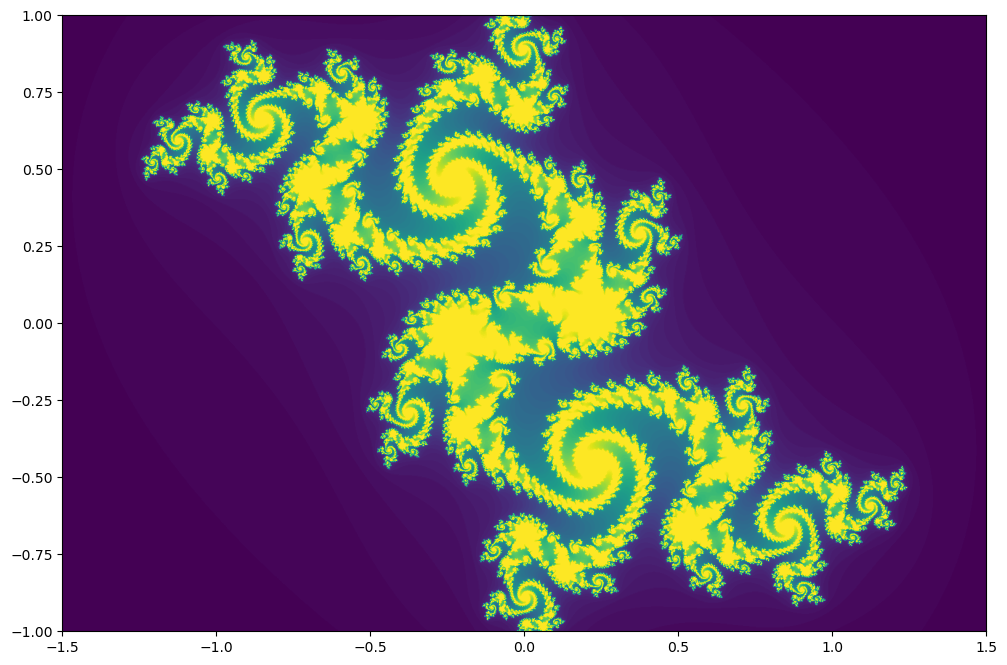

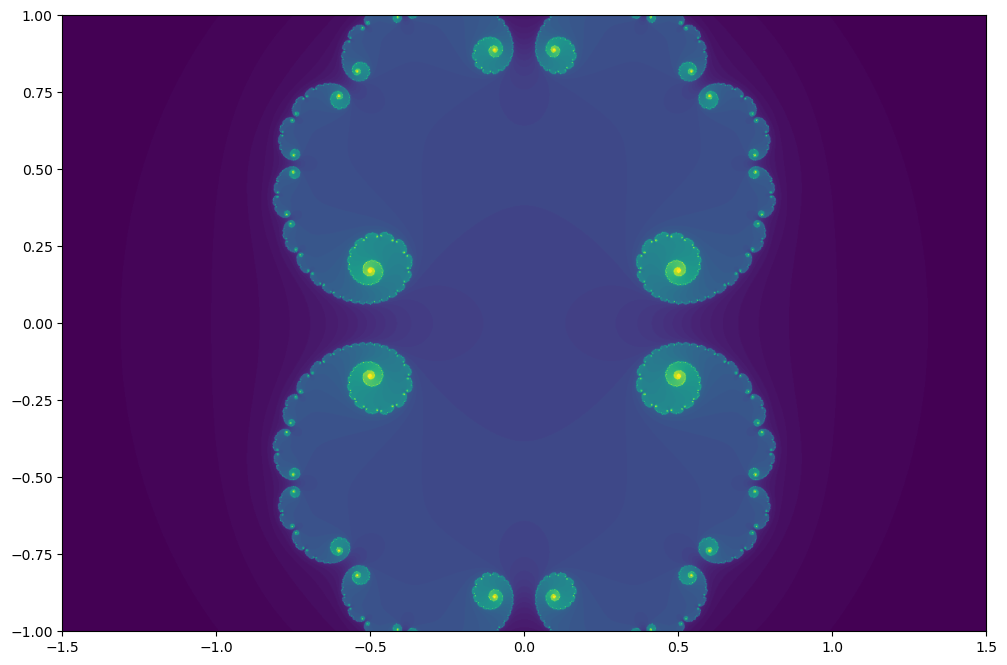

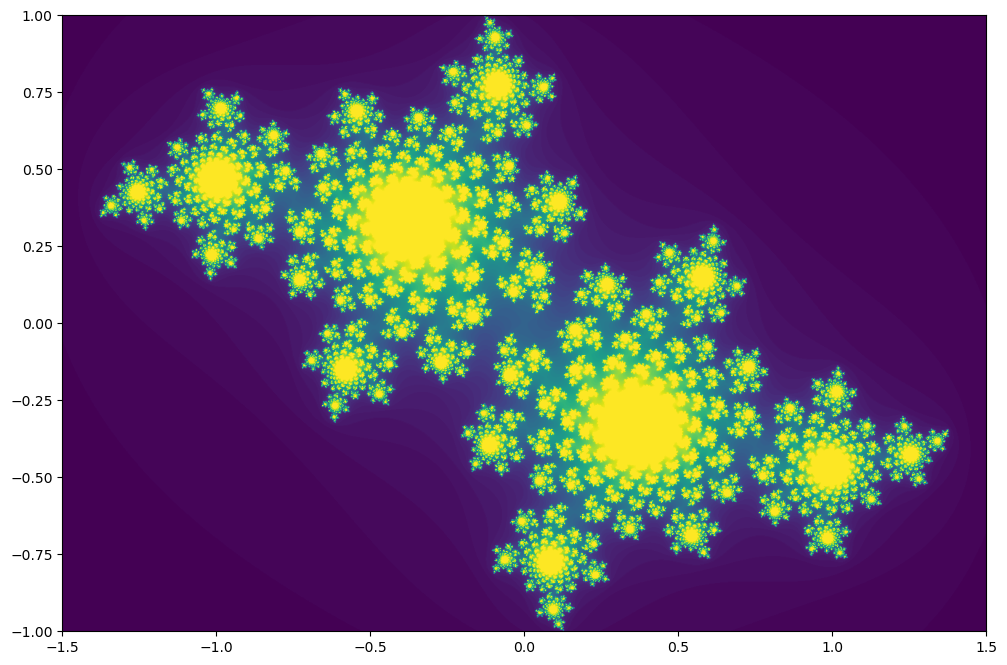

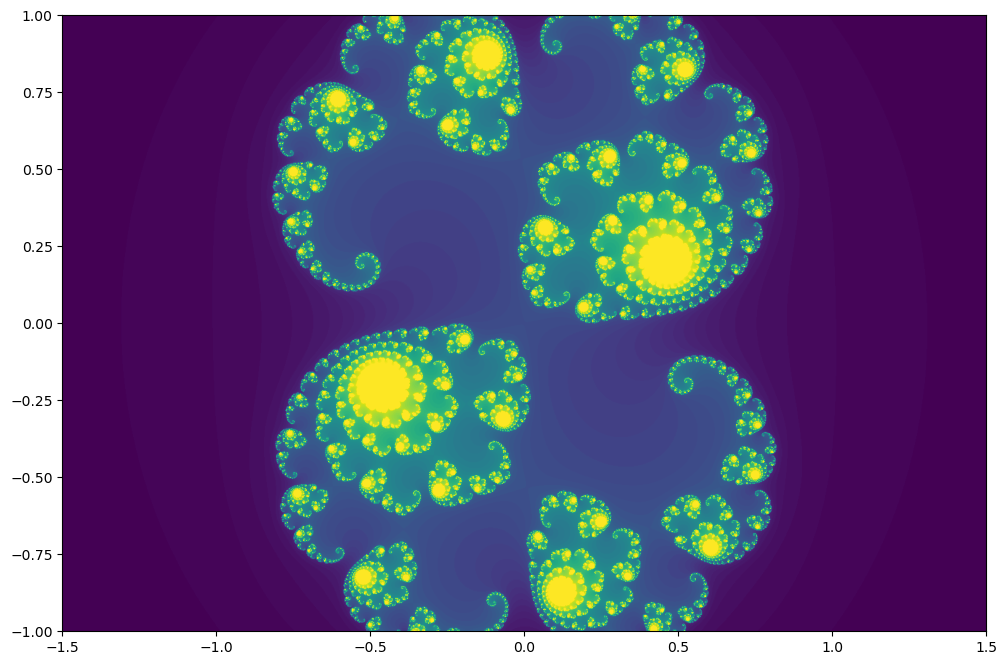

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

for J in Js:
    plt.figure(figsize=(12, 8))
    plt.imshow(J, cmap="viridis", extent=[-1.5, 1.5, -1, 1])
plt.show()